In [3]:
import tensorflow
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist ,cifar10
from tensorflow.keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")
print("All SET!")

All SET!


In [4]:
(train_img,train_labels), (test_img,test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
train_img.shape,train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
train_labels[0:8]

array([5, 0, 4, 1, 9, 2, 1, 3], dtype=uint8)

In [7]:
def img_show(train_image,train_labels2,numbers):
    plt.imshow(train_image[numbers])
    plt.title(train_labels2[numbers])
    plt.show()

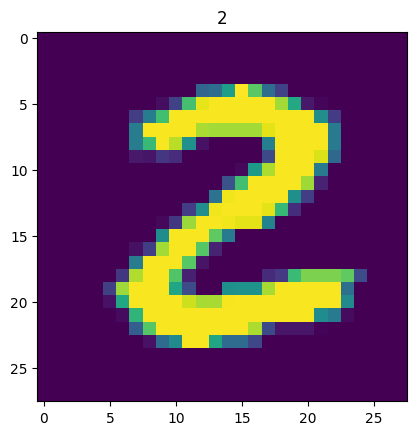

In [12]:
img_show(train_image=train_img,train_labels2=train_labels,numbers=25)

In [13]:
train_img,test_img = train_img/255.0, test_img/255.0

In [14]:
train_img = train_img.reshape((60000,28,28,1))
test_img = test_img.reshape((10000,28,28,1))

In [15]:
train_img[0].shape,test_img.shape

((28, 28, 1), (10000, 28, 28, 1))

In [16]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3)))

model.add(layers.Flatten())

model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(train_img,
                    train_labels,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8575 - loss: 0.4583 - val_accuracy: 0.9783 - val_loss: 0.0682
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9817 - loss: 0.0598 - val_accuracy: 0.9830 - val_loss: 0.0580
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9871 - loss: 0.0415 - val_accuracy: 0.9866 - val_loss: 0.0458
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9897 - loss: 0.0302 - val_accuracy: 0.9869 - val_loss: 0.0477
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9923 - loss: 0.0249 - val_accuracy: 0.9889 - val_loss: 0.0411
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9934 - loss: 0.0205 - val_accuracy: 0.9872 - val_loss: 0.0447
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9940 - loss: 0.0176 - val_accuracy: 0.9866 - val_loss: 0.0500
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9955 - loss: 0.0137 - val_accu

In [21]:
test_loss , test_acc = model.evaluate(test_img,test_labels)
print("Test loss : ",test_acc*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9851 - loss: 0.0528
Test loss :  98.86000156402588
